In [1]:
import torch, torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## Question 1

resources:

- https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
- https://pytorch.org/docs/stable/nn.html#normalization-layers


In [2]:
## Loading CIFAR-10 dataset

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train, val = torch.utils.data.random_split(trainset, [0.7, 0.3])

trainloader = torch.utils.data.DataLoader(train, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(val, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [01:00<00:00, 2803673.71it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


##### Model 1

In [3]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.fc1 = nn.Linear(2304, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [4]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.989
[1,  4000] loss: 1.597
[1,  6000] loss: 1.459
[1,  8000] loss: 1.372
[2,  2000] loss: 1.262
[2,  4000] loss: 1.189
[2,  6000] loss: 1.137
[2,  8000] loss: 1.086
Finished Training


In [5]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the val images: {100 * correct // total} %')

Accuracy of the network on the val images: 60 %


##### Model 2

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.fc1 = nn.Linear(512, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.132
[1,  4000] loss: 1.796
[1,  6000] loss: 1.602
[1,  8000] loss: 1.500
[2,  2000] loss: 1.369
[2,  4000] loss: 1.302
[2,  6000] loss: 1.266
[2,  8000] loss: 1.241
Finished Training


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the val images: {100 * correct // total} %')

Accuracy of the network on the val images: 55 %


##### Model 3

In [99]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.batch_norm = torch.nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(2304, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch_norm(x)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [100]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.736
[1,  4000] loss: 1.441
[1,  6000] loss: 1.308
[1,  8000] loss: 1.236
[2,  2000] loss: 1.093
[2,  4000] loss: 1.093
[2,  6000] loss: 1.072
[2,  8000] loss: 1.054
Finished Training


In [101]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the val images: {100 * correct // total} %')

Accuracy of the network on the val images: 62 %


##### Model 4

In [102]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(2304, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.drop_out(x)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [103]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.139
[1,  4000] loss: 1.889
[1,  6000] loss: 1.737
[1,  8000] loss: 1.653
[2,  2000] loss: 1.530
[2,  4000] loss: 1.412
[2,  6000] loss: 1.339
[2,  8000] loss: 1.288
Finished Training


In [104]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the val images: {100 * correct // total} %')

Accuracy of the network on the val images: 54 %


##### Evaluating the final model: Model 3

In [105]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.batch_norm = torch.nn.BatchNorm2d(64)
        self.fc1 = nn.Linear(2304, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.batch_norm(x)
        x = torch.flatten(x, 1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x


net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.693
[1,  4000] loss: 1.468
[1,  6000] loss: 1.299
[1,  8000] loss: 1.253
[2,  2000] loss: 1.084
[2,  4000] loss: 1.091
[2,  6000] loss: 1.065
[2,  8000] loss: 1.043
Finished Training


In [106]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


## Question 2

Res:

- https://www.projectpro.io/recipes/convert-image-tensor-pytorch
- ResNet Guide: https://pytorch.org/hub/pytorch_vision_resnet/
- https://stackoverflow.com/questions/53623472/how-do-i-display-a-single-image-in-pytorch

Photos:

- https://en.wikipedia.org/wiki/File:Egyptian_Mau_Bronze.jpg
- https://nationaltoday.com/teddy-bear-day/


In [41]:
## Load resnet library
resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
resnet.eval()

Using cache found in C:\Users\geboe/.cache\torch\hub\pytorch_vision_v0.10.0
C:\Users\geboe\anaconda3\envs\ml\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\geboe\anaconda3\envs\ml\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [42]:
### Getting ResNet categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
    
print(categories.index("fox squirrel"))
print(categories.index("Egyptian cat"))
print(categories.index("teddy"))

335
285
850


##### A Fox Squirrel

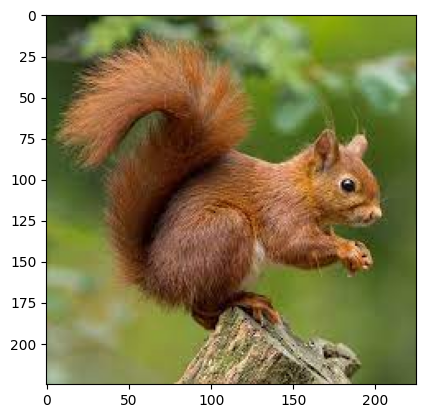

In [43]:
squirrel_img = plt.imread('imgs/fox_squirrel.jpeg')
plt.imshow(squirrel_img)

In [59]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

convert_tensor = transforms.ToTensor()
squirrel_tensor = convert_tensor(squirrel_img)
squirrel_saliency_map = np.zeros((squirrel_tensor.size()[1], squirrel_tensor.size()[2]))
squirrel_tensor.size()

torch.Size([3, 225, 225])

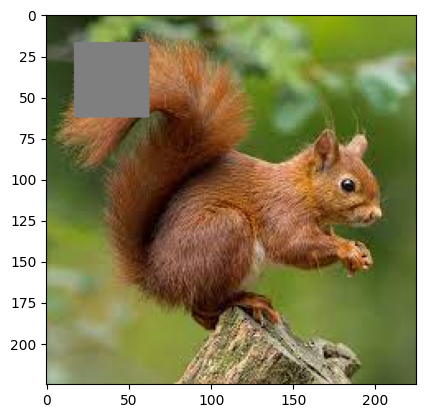

In [110]:
n = int(squirrel_tensor.size()[1] / 5)
squirrel_tensor_mod = squirrel_tensor.clone().detach()
squirrel_tensor_mod[:, 17 : n+18, 17 : n+18] = 0.5
plt.imshow(squirrel_tensor_mod.permute(1, 2, 0))

In [46]:
squirrel_tensor.size()[1] / 75

3.0

In [60]:
n = int(squirrel_tensor.size()[1] / 5)
step = int(squirrel_tensor.size()[1] / 75)
#squirrel_saliency_map = []
s = 1

for i in range(0, squirrel_tensor.size()[1], step):
    for j in range(0, squirrel_tensor.size()[2], step):
        squirrel_tensor_mod = squirrel_tensor.clone().detach()
        squirrel_tensor_mod[:, j : n+j+1, i : n+i+1] = 0.5
        input_batch = squirrel_tensor_mod.unsqueeze(0)
        with torch.no_grad():
            output = resnet(input_batch)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        squirrel_saliency_map[j : n+j+1, i : n+i+1] = probabilities[335]


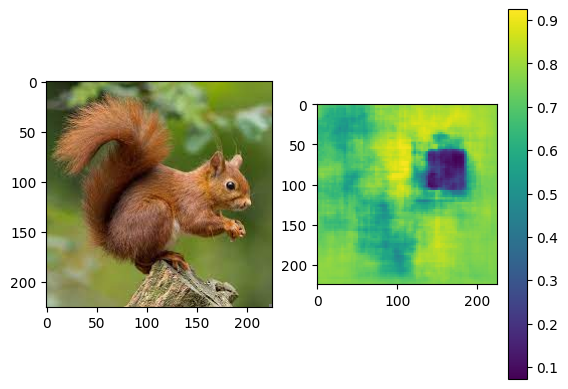

In [61]:
plt.subplot(1, 2, 1)
plt.imshow(squirrel_tensor_mod.permute(1, 2, 0))

plt.subplot(1, 2, 2)
plt.imshow(squirrel_saliency_map)
plt.colorbar()

##### An Egyptian Cat

In [62]:
eg_cat = Image.open('imgs/Egyptian_Mau.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

cat_tensor = preprocess(eg_cat)
cat_saliency_map = np.zeros((cat_tensor.size()[1], cat_tensor.size()[2]))
cat_tensor.size()

torch.Size([3, 224, 224])

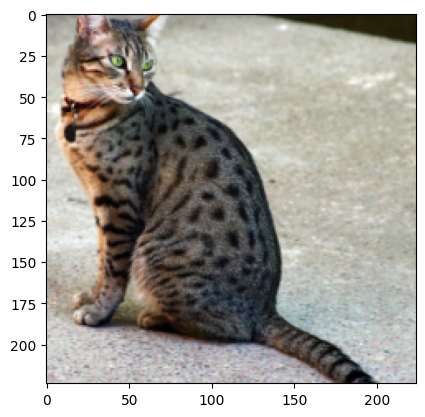

In [63]:
plt.imshow(cat_tensor.permute(1, 2, 0));

In [68]:
int(cat_tensor.size()[1] / 4)

56

In [64]:
n = int(cat_tensor.size()[1] / 4)
step = 5
s = 1

for i in range(0, cat_tensor.size()[1], step):
    for j in range(0, cat_tensor.size()[2], step):
        cat_tensor_mod = cat_tensor.clone().detach()
        cat_tensor_mod[:, j : n+j+1, i : n+i+1] = 0.5 
        input_batch = cat_tensor_mod.unsqueeze(0)
        with torch.no_grad():
            output = resnet(input_batch)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        cat_saliency_map[j : n+j+1, i : n+i+1] = probabilities[categories.index("Egyptian cat")]


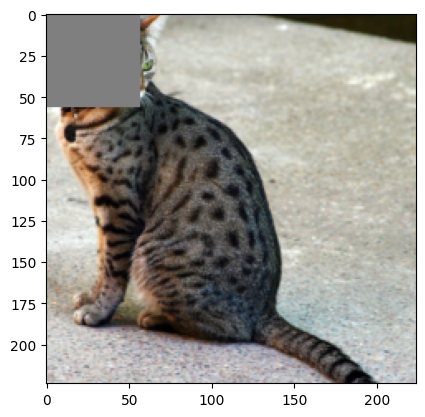

In [74]:
cat_tensor_mod = cat_tensor.clone().detach()
cat_tensor_mod[:, 0 : n+1, 0 : n+1] = 0.5
plt.imshow(cat_tensor_mod.permute(1, 2, 0))

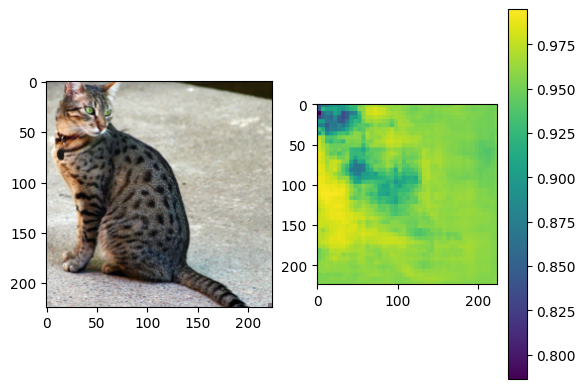

In [66]:
plt.subplot(1, 2, 1)
plt.imshow(cat_tensor.permute(1, 2, 0))

plt.subplot(1, 2, 2)
plt.imshow(cat_saliency_map)
plt.colorbar()

In [69]:
### Just to make sure the model detects if it's an Egyptian cat
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

Egyptian cat 0.9584687948226929
lynx 0.018994629383087158
tabby 0.01332811638712883
tiger cat 0.007778678555041552
hare 0.0001316060806857422


##### A Teddy Bear

In [70]:
teddy = Image.open('imgs/teddy.jpg')
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
])

teddy_tensor = preprocess(teddy)
teddy_saliency_map = np.zeros((teddy_tensor.size()[1], teddy_tensor.size()[2]))
teddy_tensor.size()

torch.Size([3, 224, 224])

In [78]:
n = int(teddy_tensor.size()[1] / 4)
step = 5
s = 1

for i in range(0, teddy_tensor.size()[1], step):
    for j in range(0, teddy_tensor.size()[2], step):
        teddy_tensor_mod = teddy_tensor.clone().detach()
        teddy_tensor_mod[:, j : n+j+1, i : n+i+1] = 0.5 
        input_batch = teddy_tensor_mod.unsqueeze(0)
        with torch.no_grad():
            output = resnet(input_batch)
        probabilities = torch.nn.functional.softmax(output[0], dim=0)
        teddy_saliency_map[j : n+j+1, i : n+i+1] = probabilities[categories.index("teddy")]


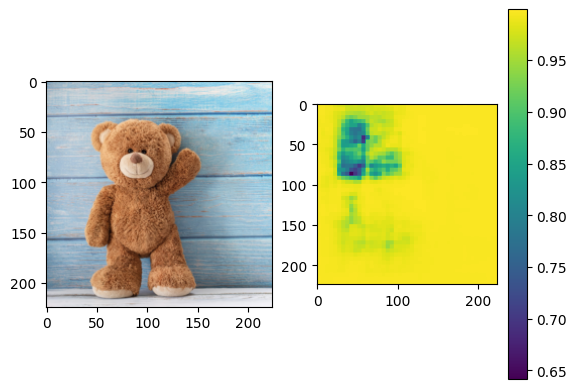

In [79]:
plt.subplot(1, 2, 1)
plt.imshow(teddy_tensor.permute(1, 2, 0))

plt.subplot(1, 2, 2)
plt.imshow(teddy_saliency_map)
plt.colorbar()

In [80]:
### Just to make sure the model detects if it's an Egyptian cat
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

teddy 0.9968114495277405
standard poodle 0.0008192226523533463
fur coat 0.0004514298925641924
toyshop 0.00026018894277513027
Christmas stocking 0.00021937579731456935


## Question 3

res:

- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html#fgsm-attack
- https://pytorch.org/tutorials/beginner/fgsm_tutorial.html#testing-function

In [94]:
eps = 0.2

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

squirrel = Image.open('imgs/fox_squirrel.jpeg')
preprocess = transforms.Compose([
    transforms.ToTensor(),
])
input_tensor = preprocess(squirrel)
input_batch = input_tensor.unsqueeze(0)

input_batch.requires_grad = True

output = resnet(input_batch)

init_pred = output.max(1, keepdim=True)[1]

loss = F.nll_loss(output, torch.tensor([categories.index("fox squirrel")]))

resnet.zero_grad()

loss.backward()

img_grad = input_batch.grad.data

## Get the perturbed image
sign_img_grad = img_grad.sign()
perturbed_img = input_tensor + eps * img_grad.detach().squeeze(0)

## Reclassify the perturbed image
perturbed_batch = perturbed_img.unsqueeze(0)
output = resnet(perturbed_batch)

probabilities = torch.nn.functional.softmax(output[0], dim=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


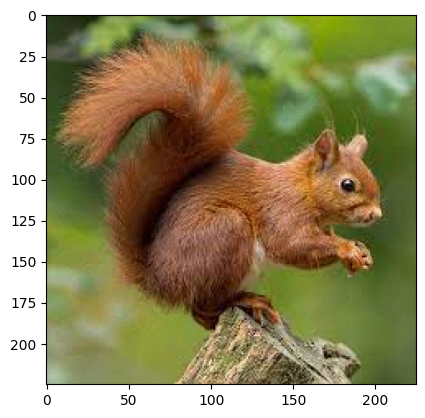

In [95]:
plt.imshow(perturbed_img.permute(1, 2, 0));

In [96]:
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

window screen 0.042391419410705566
hamster 0.02505956031382084
binder 0.015389935113489628
goldfish 0.01297056395560503
axolotl 0.012628846801817417
